In [51]:
import math
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot



from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, Matern

Automatically created module for IPython interactive environment


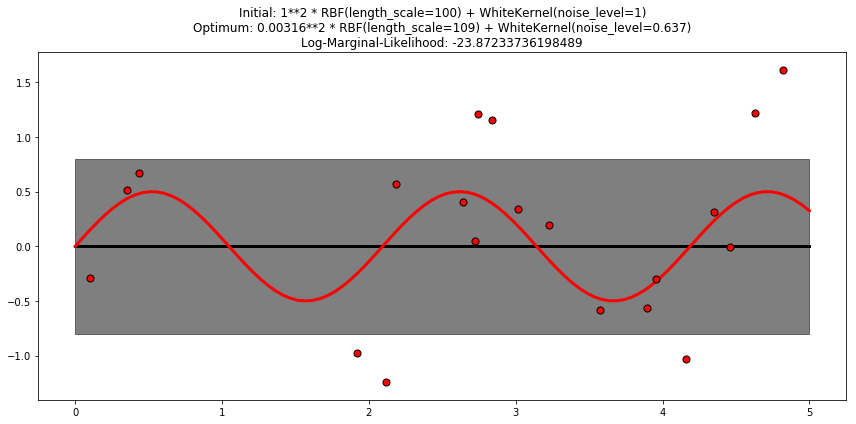

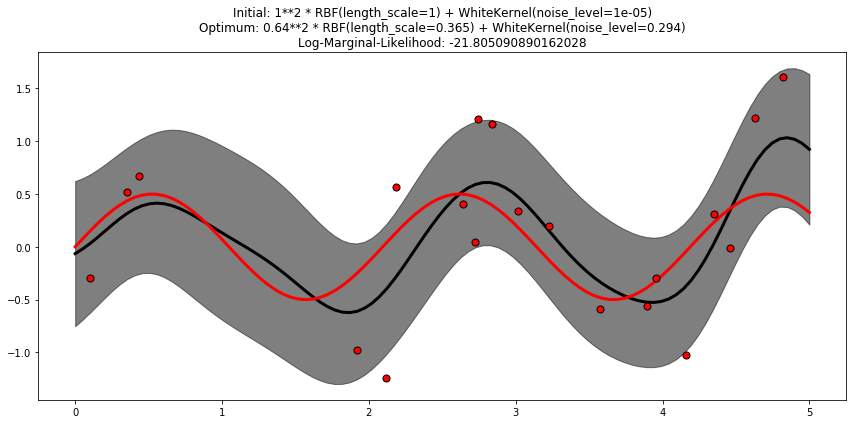

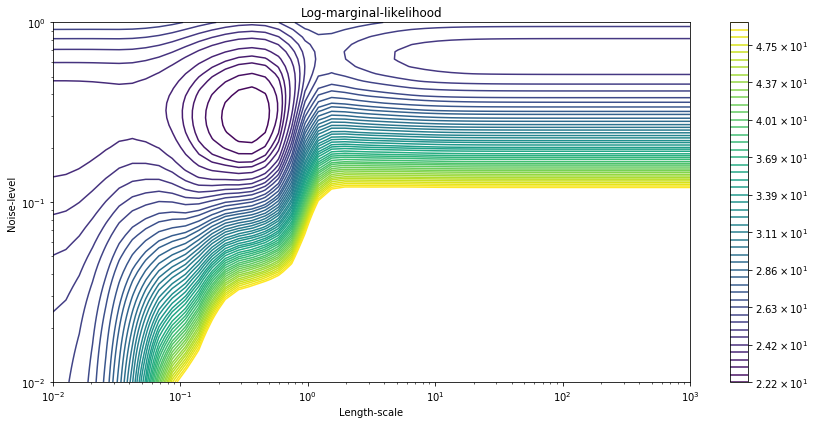

In [52]:
#Example of code
# code for marginal likelihood
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Second run
plt.figure(1)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Plot LML landscape
plt.figure(2)
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

Automatically created module for IPython interactive environment
Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy: 1.000 (initial) 1.000 (optimized)
Log-loss: 0.214 (initial) 0.319 (optimized)


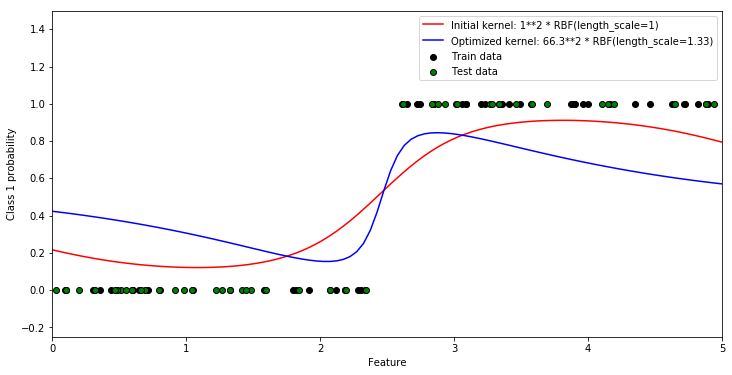

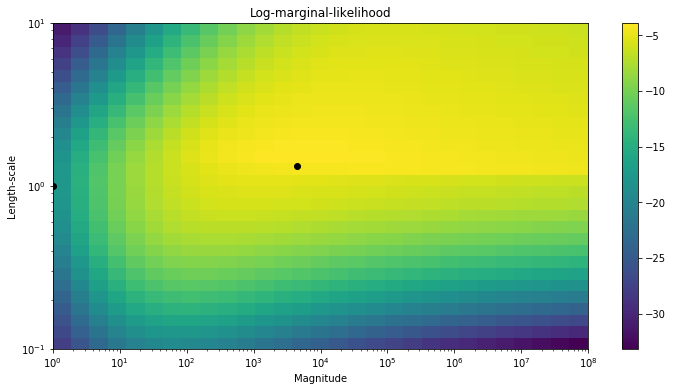

In [53]:
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


# Generate data
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 100)[:, np.newaxis]
y = np.array(X[:, 0] > 2.5, dtype=int)

# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])),
         accuracy_score(y[:train_size], gp_opt.predict(X[:train_size]))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]),
         log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1])))


# Plot posteriors
plt.figure(0)
plt.scatter(X[:train_size, 0], y[:train_size], c='k', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X[train_size:, 0], y[train_size:], c='g', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Plot LML landscape
plt.figure(1)
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

In [54]:
def ou_levels(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

In [55]:
#OU data
# get OU data first
dt=0.02
time=np.arange(0,2,dt)# time
sigma=0.3
a=1# the coefficient in front, the rate
b=1.2# the mean
training_data=ou_levels(a,b,dt,sigma,time)
#t=time# time vector
#x=training_data
#t=t[::8]
#x=x[::8]
#t_column=t.reshape(-1,1)
#x_column=x.reshape(-1,1)

In [56]:
# changing the code
X=time.reshape(-1,1)
y=training_data

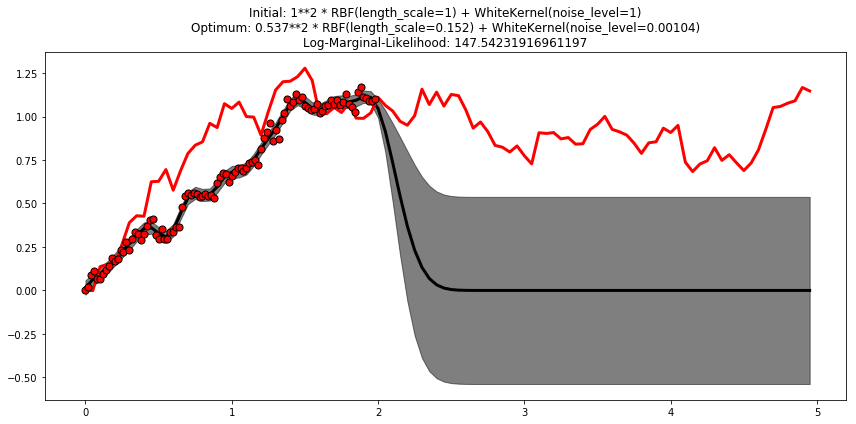

In [57]:
# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=1.0) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
#X_ = np.linspace(0, 5, 100)# watch it here, old code
dt=0.05
X_=np.arange(0,5,dt)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
time_=X_
y_=ou_levels(a,b,dt,sigma,time)
plt.plot(X_, y_, 'r', lw=3, zorder=9)# this is what I think about, ou_levels(a,b,dt,sigma,time)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()
plt.show()


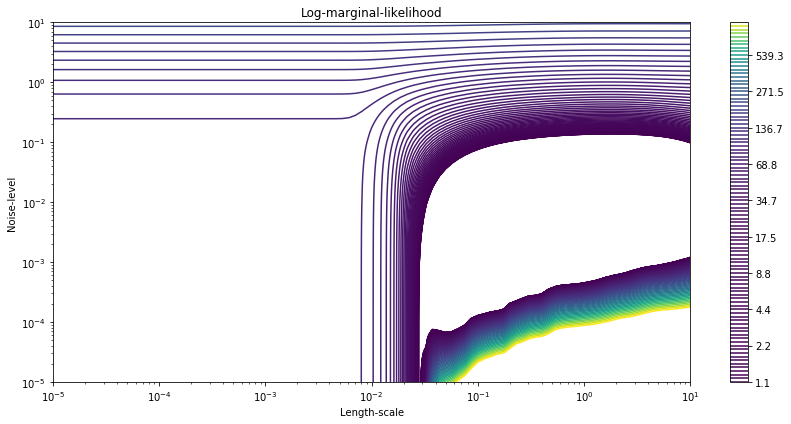

In [58]:
theta0 = np.logspace(-5, 1, 100)
theta1 = np.logspace(-5, 1, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.70, Theta0[i, j], Theta1[i, j]]))# here is the key that 0.70 that is the function variance
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

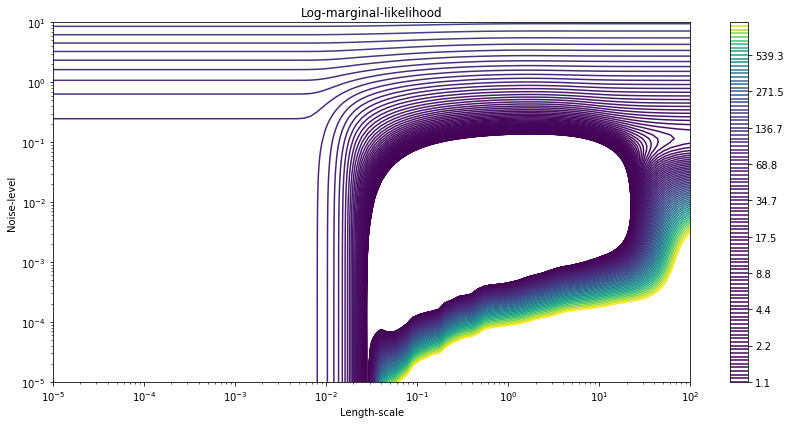

In [59]:
theta0 = np.logspace(-5, 2, 100)
theta1 = np.logspace(-5, 1, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.70, Theta0[i, j], Theta1[i, j]]))# here is the key that 0.70 that is the function variance
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

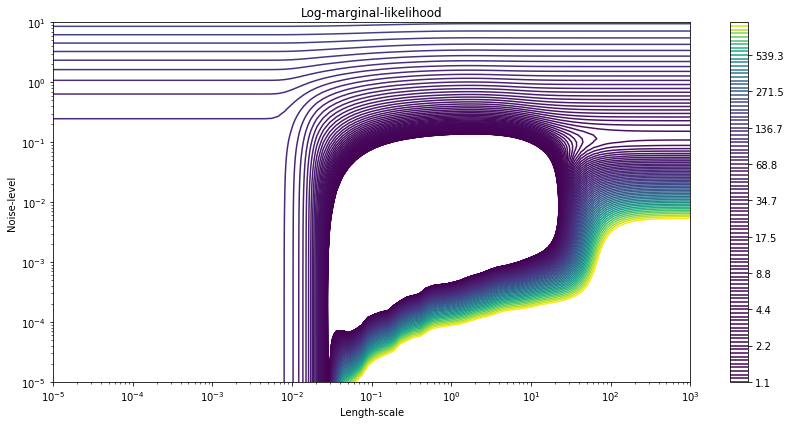

In [60]:
theta0 = np.logspace(-5, 3, 100)
theta1 = np.logspace(-5, 1, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.70, Theta0[i, j], Theta1[i, j]]))# here is the key that 0.70 that is the function variance
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

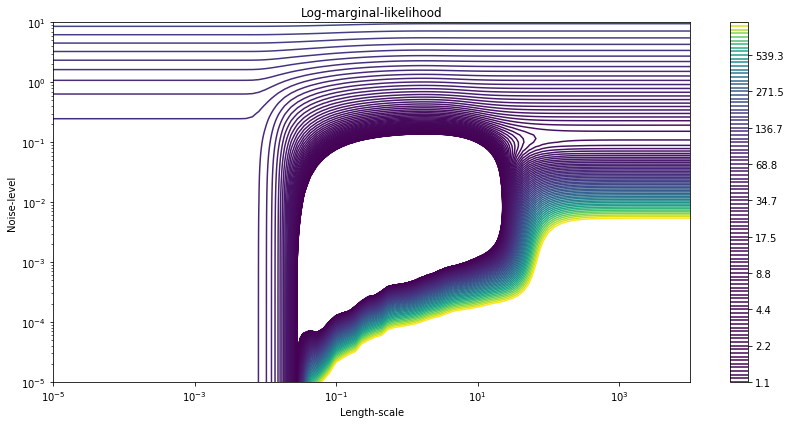

In [61]:
theta0 = np.logspace(-5, 4, 100)
theta1 = np.logspace(-5, 1, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.70, Theta0[i, j], Theta1[i, j]]))# here is the key that 0.70 that is the function variance
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

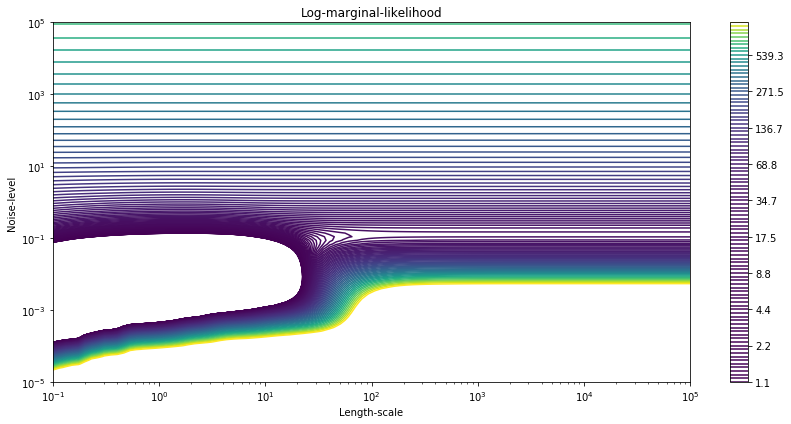

In [62]:
theta0 = np.logspace(-1, 5, 100)# lengthscale
theta1 = np.logspace(-5, 5, 100)#noise level
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.70, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

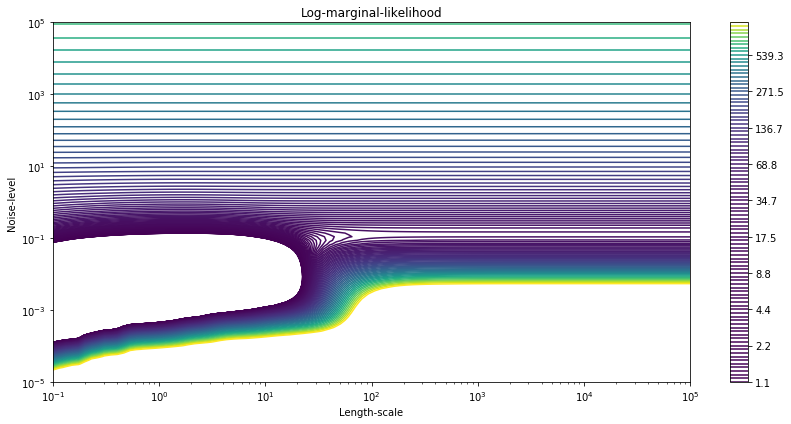

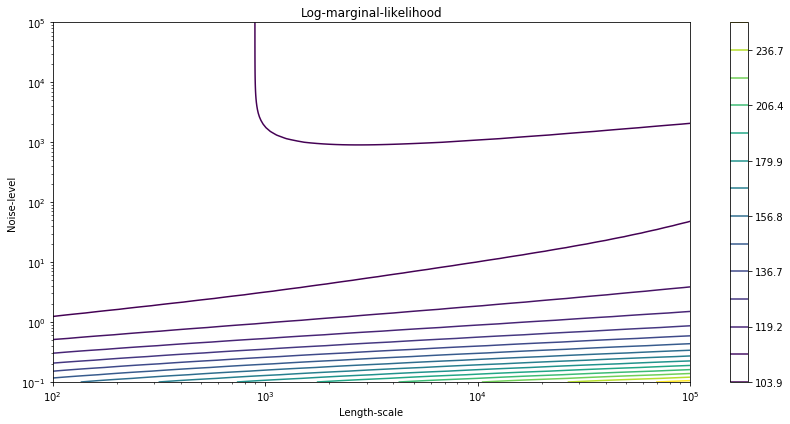

In [63]:
theta0 = np.logspace(-1, 5, 100)# lengthscale
theta1 = np.logspace(-5, 5, 100)#noise level
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.70, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

theta0=np.logspace(2, 5, 100)# variance
theta1=np.logspace(-1,5,100)#lengthscale
Theta0, Theta1 = np.meshgrid(theta0, theta1)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()




In [64]:
gp.log_marginal_likelihood(np.log([0.70, 1, 2]))

-130.50143202414012

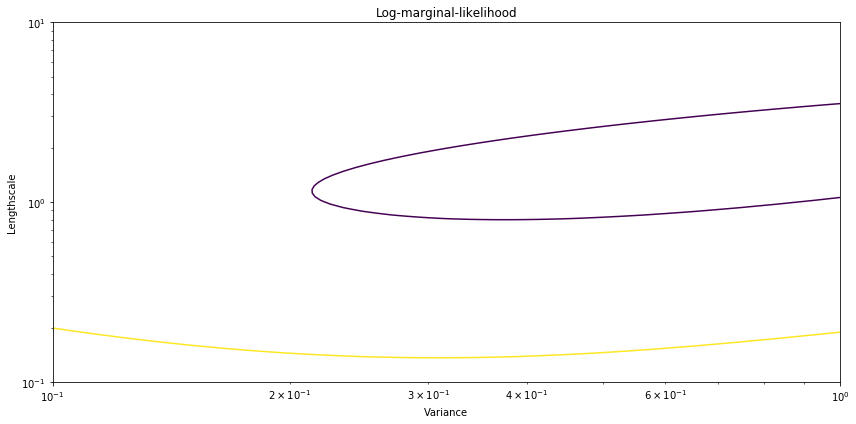

In [65]:
#Plot the variance against the lengthscale
theta1=np.logspace(-1,0,100)# variance or amplitude, true value is 0.3
theta0=np.logspace(-1,1,100)#lengthscale # true value is 1
Theta1, Theta0 = np.meshgrid(theta1, theta0)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta0[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta1, Theta0, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Variance")
plt.ylabel("Lengthscale")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()





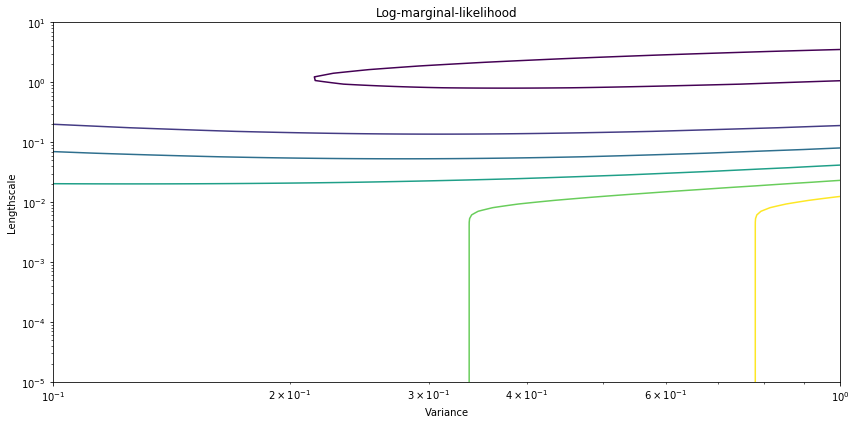

In [66]:
#Plot the variance against the lengthscale
theta1=np.logspace(-1,0,100)# variance or amplitude, true value is 0.3
theta0=np.logspace(-5,1,100)#lengthscale # true value is 1
Theta1, Theta0 = np.meshgrid(theta1, theta0)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta0[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta1, Theta0, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Variance")
plt.ylabel("Lengthscale")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()


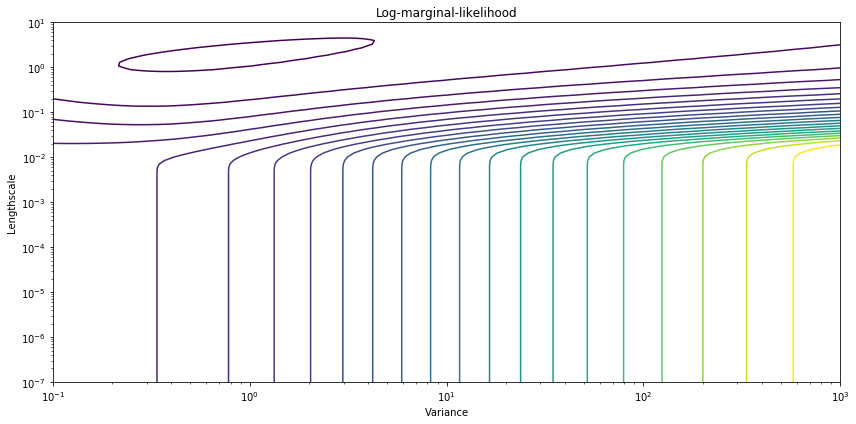

In [67]:
#Plot the variance against the lengthscale
theta1=np.logspace(-1,3,100)# variance or amplitude, true value is 0.3
theta0=np.logspace(-7,1,100)#lengthscale # true value is 1
Theta1, Theta0 = np.meshgrid(theta1, theta0)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta0[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta1, Theta0, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Variance")
plt.ylabel("Lengthscale")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()


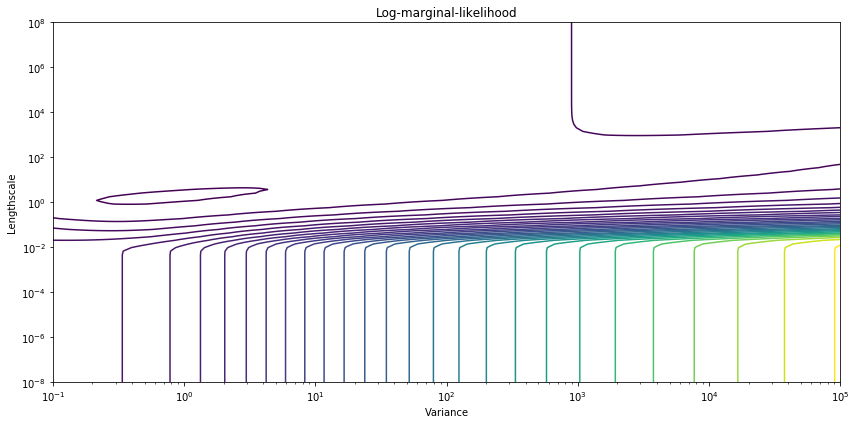

In [68]:
#Plot the variance against the lengthscale
theta1=np.logspace(-1,5,100)# variance or amplitude, true value is 0.3# x-axis
theta0=np.logspace(-8,8,100)#lengthscale # true value is 1# y-axis
Theta1, Theta0 = np.meshgrid(theta1, theta0)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta0[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta1, Theta0, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Variance")
plt.ylabel("Lengthscale")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()

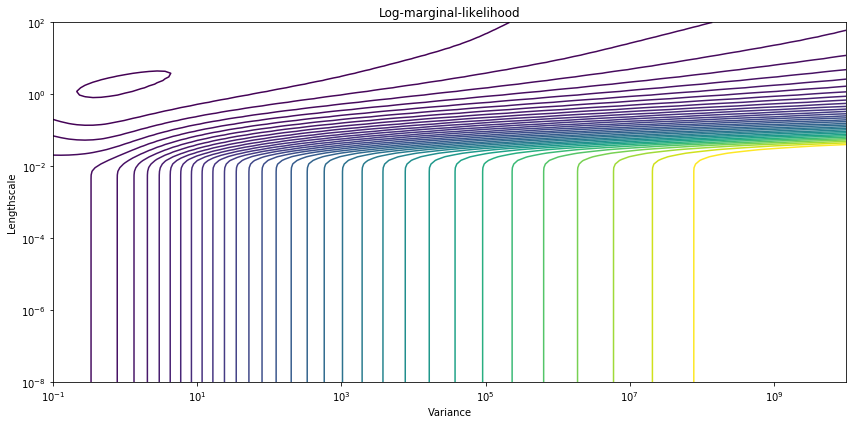

In [69]:
#Plot the variance against the lengthscale
theta1=np.logspace(-1,10,100)# variance or amplitude, true value is 0.3# x-axis
theta0=np.logspace(-8,2,100)#lengthscale # true value is 1# y-axis
Theta1, Theta0 = np.meshgrid(theta1, theta0)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta0[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta1, Theta0, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Variance")
plt.ylabel("Lengthscale")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()

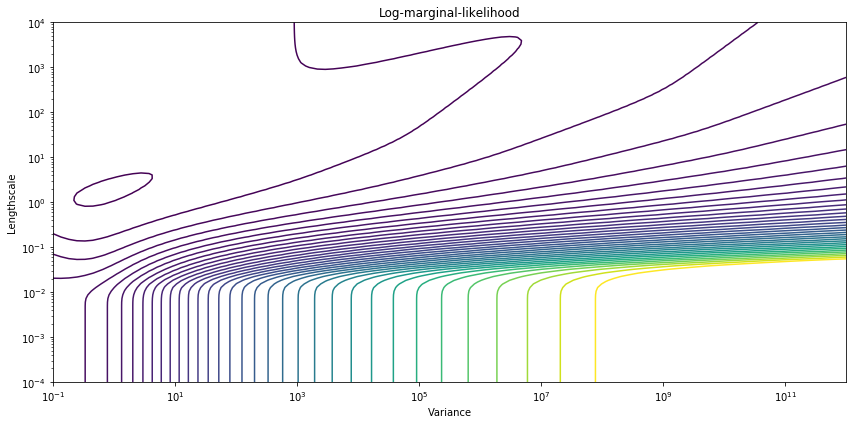

In [70]:
#Plot the variance against the lengthscale
theta1=np.logspace(-1,12,100)# variance or amplitude, true value is 0.3# x-axis
theta0=np.logspace(-4,4,100)#lengthscale # true value is 1# y-axis
Theta1, Theta0 = np.meshgrid(theta1, theta0)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta0[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta1, Theta0, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Variance")
plt.ylabel("Lengthscale")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()

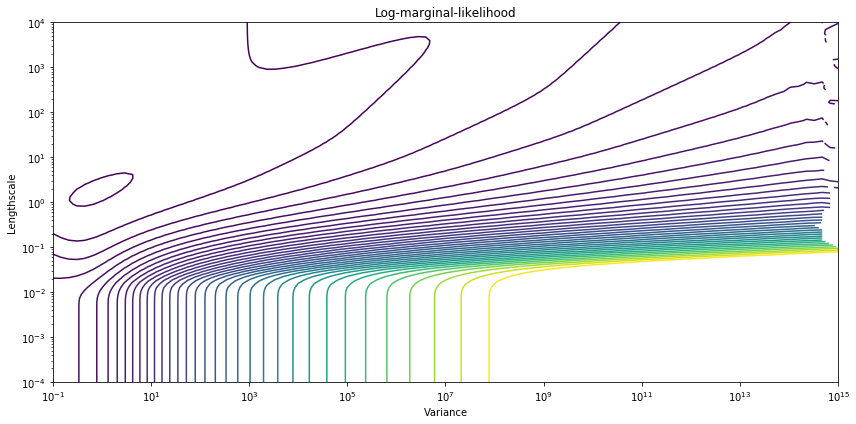

In [71]:
#Plot the variance against the lengthscale
theta1=np.logspace(-1,15,100)# variance or amplitude, true value is 0.3# x-axis
theta0=np.logspace(-4,4,100)#lengthscale # true value is 1# y-axis
Theta1, Theta0 = np.meshgrid(theta1, theta0)
#LML = gp.log_marginal_likelihood(np.log([1, 2,1]))
LML = [[gp.log_marginal_likelihood(np.log([Theta1[i, j], Theta0[i, j],1]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
level = np.around(np.logspace(0.05, 3, 100), decimals=1)
plt.contour(Theta1, Theta0, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Variance")
plt.ylabel("Lengthscale")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()

In [72]:
# correct code from Colin
# see below 

C:\Anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]


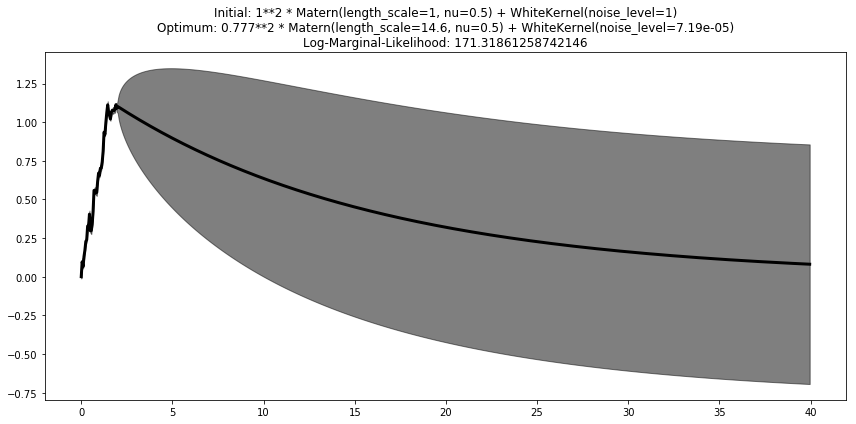

In [73]:
# First run
plt.figure(0)
kernel = ConstantKernel(1.0) * Matern(length_scale=1.0,nu=0.5) \
    + WhiteKernel(noise_level=1)
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
#X_ = np.linspace(0, 5, 100)# watch it here, old code
dt=0.05
X_=np.arange(0,40,dt)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
# time_=X_
# y_=ou_levels(a,b,dt,sigma,time)
# plt.plot(X_, y_, 'r', lw=3, zorder=9)# this is what I think about, ou_levels(a,b,dt,sigma,time)
# plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
           % (kernel, gp.kernel_,
              gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()
plt.show()

In [74]:
theta0 = np.linspace(1e-4, 1, 40)
theta1 = np.linspace(1e-4, 2, 40)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood([np.log(Theta0[i, j]), np.log(Theta1[i, j]),gp.kernel_.theta[2]])# here is the key that 0.70 that is the function variance
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

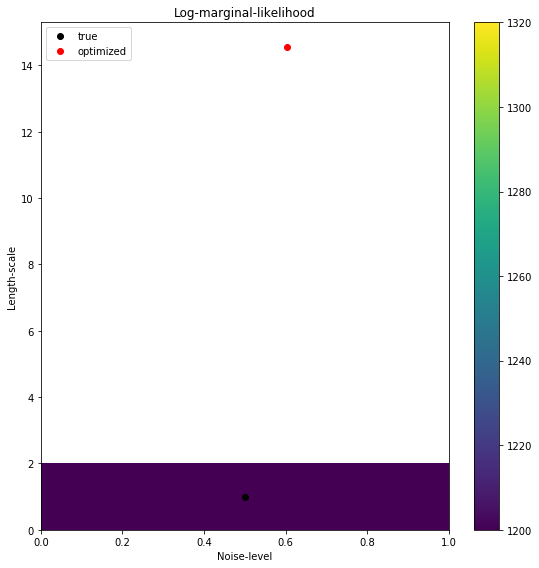

In [75]:
plt.figure(figsize=(8,8))
plt.ylabel("Length-scale")
plt.xlabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
#plt.axis('equal')
plt.pcolor(Theta0, Theta1, LML,vmin=1200,vmax=1320)
plt.colorbar()
plt.plot(0.5, 1, 'ko', zorder=10,label='true')
plt.plot(np.exp(gp.kernel_.theta[0]), np.exp(gp.kernel_.theta[1]), 'ro', zorder=10,label='optimized')
plt.legend(loc="upper left")
plt.show()


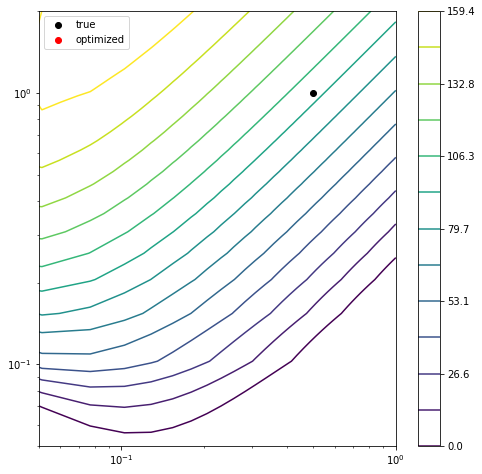

In [76]:
plt.figure(figsize=(8,8))
level = np.linspace(0, 1315, 100)#, decimals=1)
plt.contour(Theta0, Theta1, LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.plot(0.5, 1, 'ko', zorder=10,label='true')
plt.plot(np.exp(gp.kernel_.theta[0]), np.exp(gp.kernel_.theta[1]), 'ro', zorder=10,label='optimized')
plt.legend(loc="upper left")
plt.xscale("log")
plt.yscale("log")
plt.axis([0.05,1,0.05,2])
plt.show()
